Shape: (10567, 6)
  source_x                                              title  \
0      PMC              Auf Solidarität muss Solidität folgen   
1  Medline  Diaphragmatic hernia after percutaneous radiof...   
2      PMC                                    Meet the Editor   
3      PMC  Exploring the Ecology of Third Age Informal La...   
4  Medline   Answering Key Questions About COVID-19 Vaccines.   

                                            abstract publish_time  \
0  Over the past two decades, the member states o...   2022-03-15   
1                                                NaN         2011   
2                                                NaN   2021-08-13   
3  This research explores the factors involved in...   2021-12-17   
4                                                NaN   2020-10-16   

                                             authors  \
0                   Busch, Berthold; Matthes, Jürgen   
1  Hiraki, Takao; Gobara, Hideo; Masaoka, Yoshihi...   
2       

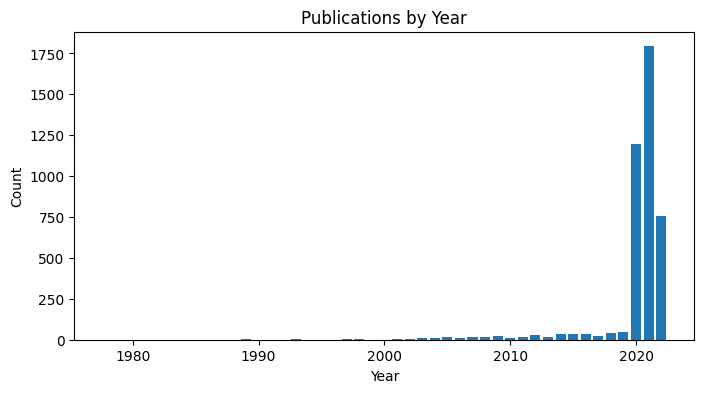

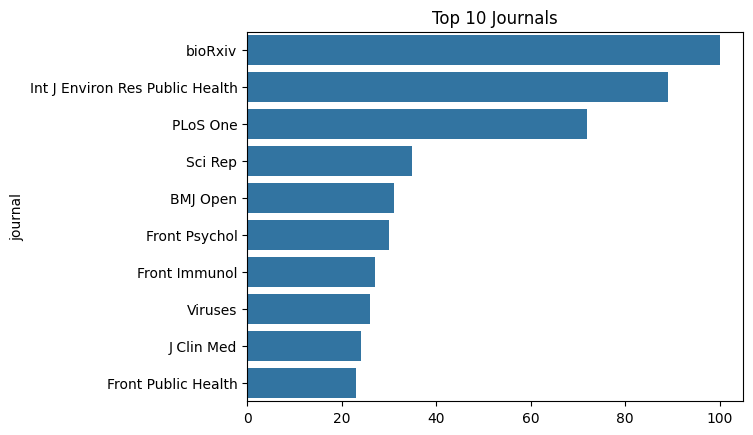

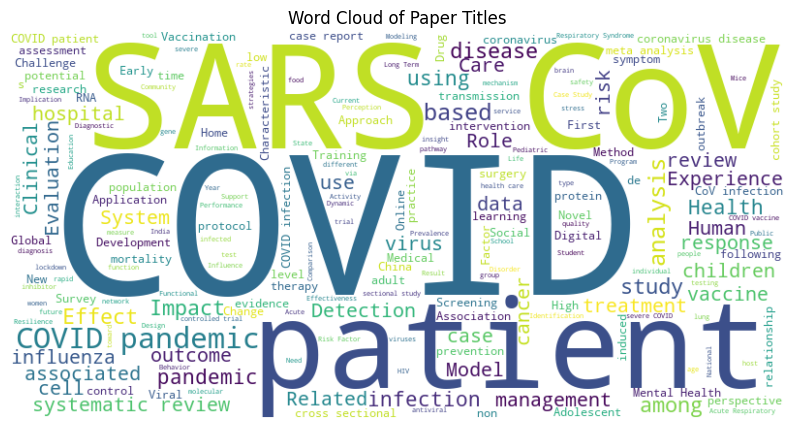

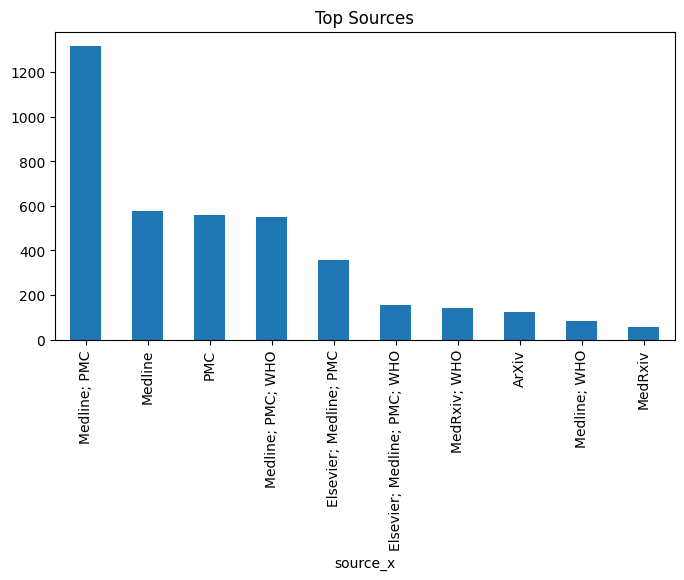

In [2]:
# Part 1: Data Loading and Basic Exploration
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Load only needed columns to save memory
use_cols = ["title", "abstract", "publish_time", "authors", "journal", "source_x"]
df = pd.read_csv("data/metadata.csv", usecols=use_cols, low_memory=False)

print("Shape:", df.shape)
print(df.head())
print(df.info())
print(df.isnull().sum())

# Part 2: Data Cleaning
df = df.dropna(subset=["title", "abstract", "publish_time"])
df["publish_time"] = pd.to_datetime(df["publish_time"], errors="coerce")
df = df.dropna(subset=["publish_time"])
df["year"] = df["publish_time"].dt.year
df["abstract_word_count"] = df["abstract"].apply(lambda x: len(str(x).split()))

print("Cleaned shape:", df.shape)

# Part 3: Data Analysis & Visualization

# Papers per year
year_counts = df["year"].value_counts().sort_index()
plt.figure(figsize=(8,4))
plt.bar(year_counts.index, year_counts.values)
plt.title("Publications by Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

# Top 10 journals
top_journals = df["journal"].value_counts().head(10)
sns.barplot(y=top_journals.index, x=top_journals.values)
plt.title("Top 10 Journals")
plt.show()

# Word Cloud from titles
titles_text = " ".join(df["title"].dropna().astype(str).tolist())
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(titles_text)
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Paper Titles")
plt.show()

# Distribution of papers by source
plt.figure(figsize=(8,4))
df["source_x"].value_counts().head(10).plot(kind="bar")
plt.title("Top Sources")
plt.show()
